# Tutorial: Retrieval Augmented Generation with Citation (RAG-C)
## GRAD-E1394 Deep Learning -- Assignment 3
Authors:
*   Amin Oueslati, a.oueslati@students.hertie-school.org
*   Steven Kerr, s.kerr@students.hertie-school.org
*   Kai Foerster, k.foerster@students.hertie-school.org 



This tutorial explains how to use Retrieval Augmented Generation with Citation (RAG-C), incorporating Falcon 6B, a cutting-edge, open-source Large Language Model (LLM), and LangChain, a library for creating LLM applications. It shows how RAG-C improves LLM responses by adding external information. The process is demonstrated with a case study on coffee prices in Berlin Mitte. Initially, the LLM provides answers about these prices without extra context; then, it does so with specific information, highlighting the difference between its uninformed and informed responses. Participants will learn to incorporate documents from the Federal Acquisition Regulation (FAR) into RAG-C, using it to retrieve detailed FAR-related information. The tutorial ends with a quiz comparing responses from a standard LLM and the RAG-C enhanced LLM on FAR-specific questions. This comparison demonstrates RAG-C's ability to greatly improve the accuracy and relevance of LLM responses, emphasizing its importance in the development of LLM applications.

# Table of Contents


*   [Memo](#memo)
*   [Overview](#overview)
*   [Background & Prerequisites](#background-and-prereqs)
*   [Software Requirements](#software-requirements)
*   [Data Description](#data-description)
*   [Methodology](#methodology)
*   [Results & Discussion](#results-and-discussion)
*   [References](#references)


<a name="memo"></a>
# Memo

Poor knowledge management is negatively impacting governments globally. In this regard, the very nature of government is often 
inextricably linked to the problem. Firstly, governments are enormous organizations, typically amounting to a country’s single largest employer. Secondly, governments are sparse and complex in their structure, stretching across hundreds of interdependent agencies and sub-agencies. Thirdly, the knowledge in government concerns highly technical matters, which change continuously as new laws are created or existing laws updated. 

The detrimental consequences of poor knowledge management in government are multifaceted. Resources are lost, as staff spends up to 20% of its weekly working hours on acquiring internal knowledge (Partnership for Public Service, 2019). Additionally, governments make suboptimal policy decisions, as information is siloed and not accounted for in decision-making processes. One of the most severe examples is 9/11, which likely could have been prevented, had there been better knowledge-sharing across US security agencies (9/11 Commission Report, 2004). Lastly, a state’s legitimacy heavily depends on the adherence to its governing rules: If its officials fail to respect them, due to poor knowledge management, this threatens a government’s democratic foundations.

To tackle poor knowledge management in government, this tutorial introduces Retrieval Augmented Generation with Citations (RAG+C). Essentially, RAG+C is a method for providing LLMs with additional contextual information when answering questions. Thus, it is best understood as a conversational chatbot that has access to highly domain-specific knowledge. Importantly, RAG+C outperforms alternative solutions both in terms of trustworthiness and practicability. Firstly, the additional contextual information avoids hallucinations, while the citations enable users to manually validate the responses. Secondly, the RAG+C architecture is compatible with all LLMs, including any in-house models, and allows governments to store the contextual documents on its own servers. Thirdly, compared to fine-tuning the model, updating the data base is much more practical, as it requires limited technical expertise and is computationally inexpensive. 





<a name="overview"></a>
# Overview

This tutorial offers a focused exploration of Retrieval Augmented Generation with Citation (RAG-C), employing the Falcon 6B Large Language Model (LLM) and LangChain, to address the challenge of information accuracy in public policy-related inquiries. The primary goal is to demonstrate the significant enhancement in response quality when an LLM is augmented with specific contextual information. With this tutorial, we provide the participant with a hands-on and step-by-step guide through two applications of RAG-C enhanced models.  

In the first application, participants are presented the LLM's base capability to generate responses without context – as seen in its attempt to provide coffee prices in Berlin Mitte. These responses are contrasted to responses of the same LLM when it is informed by specific contextual data in the prompt, which is the basic idea behind RAG enhanced models. This part of the tutorial highlights the issue of hallucination in LLMs and the importance of context for increases accuracy of responses.  

The second application involves programming the RAG-C enhanced LLM using documents from the Federal Acquisition Regulation (FAR), the rule book for public procurement issuance in the United States. This hands-on application emphasizes how RAG-C can be tailored to deliver precise, contextually relevant information in policy-related fields. The tutorial concludes in a quiz focused on FAR, comparing the performance of the standard LLM against the RAG-C-enhanced model. This comparison not only showcases the effectiveness of RAG-C in reducing misinformation and enhancing accuracy but also serves as a learning outcome for users, demonstrating the practical implications of using augmented LLMs in public policy domains.  

A standout aspect of this tutorial is its commitment to open-source accessibility, ensuring that all models, codes, and methods demonstrated are available to everyone. Moreover, the tutorial is designed with computational efficiency in mind. Unlike the resource-heavy process of fine-tuning LLMs, the methods and applications showcased can be comfortably executed on standard laptops. This approach not only makes the tutorial more accessible but also practical for those with limited computational resources.  

Overall, the tutorial is designed to provide users with clear understanding and a hands-on policy application of how LLM can be augmented to improve their reliability, relevance and privacy conformity, without the need to fall back to paid LLM solutions.  

<a name="background-and-prereqs"></a>
# Background & Prerequisites

A fundamental understanding of machine learning is required for this tutorial. Specifically, the reader should be familiar with what a large language model is, how vectorisation of text data works and how similarity measures such as cosine similarity can be used on vectorised texts to find text snippets that are similar to each other contextually speaking.

Retrieval Augmented Generation with Citation (RAG-C) is a sophisticated process that marries the expansive knowledge of a Large Language Model (LLM) with the precision of targeted information retrieval. The process can be best explained with reference to the illustration below.

The process starts with a user query, in this case the question: “How much does a Lebkuchen Latte cost at Pret a Manger in Berlin Mitte?” Without the RAG-C component, this query would directly feed into the LLM which would generates a response (follow the arrows in blue). For general knowledge questions or questions that the LLM has encountered during the training process, the responses are usually pretty good. The problem is, that most LLM have not been trained on data that we would like it to know, such as internal data from public institutions, more recent events that happened after the training process of the LLM or in this case the price of a Lebkuchen Latte. When one still insist to ask the LLM about such internal data or recent events, as we will see in the tutorial, it comes up with a false answers that are hallucinated. In scientific language, the question one asked is not in the parametric knowledge of the LLM, and hence the LLM invents knowledge. 

With RAG-C in contrast, the parametric knowledge of the LLM is augmented with source knowledge which is saved in a vector database. Essentially, we enable the LLM to retrieve additional relevant information beyond its parametric knowledge to answer a question. To understand how exactly the LLM is fed with the most relevant information to answer the question, let us look at the RAG-C pipeline represented in white arrow in the illustration below.

In the RAG-C pipeline, the query is transformed into a numerical representation known as a query vector. This transformation is accomplished through an embedding model, which digests the textual query and outputs a high-dimensional vector that captures its semantic essence. The magic lies in the embedding model's ability to encode the meaning of the text into a mathematical form that can be compared and matched against a vast repository of similarly encoded information in the vector database using methods such as cosine similarity.

With the query vector in hand, the system then interacts with a vector database. This database is a curated collection of information that has been pre-processed and stored as vectors. The query vector serves as a key to find relevant contexts within this database—contexts that are semantically close to the intent and content of the initial query. To find those texts, text vectors are compared on their similarity score, such as cosine similarity score, and those contexts with the highest score are retrieved.

The retrieved contexts are then fed to the LLM along with the original query text. This hybrid input, augmented with specific, relevant information, enables the LLM to generate responses that are not only contextually rich but also grounded in the retrieved data. The retrieved sources can further be added as references to the LLM response, bringing the 'C' (citation) element in RAG-C to light. 

In [81]:
from IPython.display import Image
Image(url="https://raw.githubusercontent.com/kaifoerster/dl-tutorial/main/images/RAG%20illustration%202.png")

## Videos
This video gies an easy, hands-on introduction into RAG:

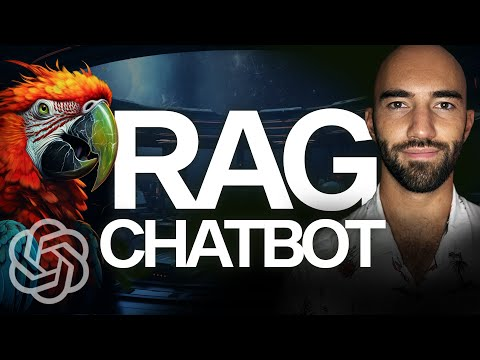

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('LhnCsygAvzY')

## Reading materials

This tutorial is designed to give you a thorough introduction to RAG-Cs. While the tutorial focuses more on their hands-on implementation, these resources extend and deepen the content covered in the tutorial through conceptual underpinnings from academia and follow-up discussions.

* [Seminal paper on RAG introduced at teh 34th NeurIPS in 2020](https://proceedings.neurips.cc/paper/2020/file/6b493230205f780e1bc26945df7481e5-Paper.pdf): Lewis, P., Perez, E., Piktus, A., Petroni, F., Karpukhin, V., Goyal, N., Kuettler, H., Lewis, M., Yih, W., Rocktaeschel, T., Riedel, S and Kiela, D. (2020) 
* [Here is a presentation of the above paper by the author](https://www.youtube.com/watch?v=JGpmQvlYRdU): Lewis, P. (2020)
* [More on obstacles for RAG and potential remedies](https://aclanthology.org/2022.naacl-srw.7/): Yu, W. (2022)
* [Blog post on evaluating RAG models](https://towardsdatascience.com/a-3-step-approach-to-evaluate-a-retrieval-augmented-generation-rag-5acf2aba86de): Besbes, A. (2023, Nov)


<a name="software-requirements"></a>
# Software Requirements
To run the first part of this tutorial up the the deployment in chainlit, it's necessary to have the following libraries installed. For a seamless experience, we suggest using Google Colab equipped with a GPU runtime, as it has most dependenciespre-installed, eliminating the need to configure dependencies.

For executing the notebook locally, it's advisable to have Python version 3.10 installed. One can use pipenv to install all below libraries into a new virtual environment which comes with the benefit that all dependencies are automatically configured by pipenv. 

Following the necessary libraries to run this notebook:

* langchain
* sentence_transformers
* chromadb
* unstructured
* chainlit
* python-dotenv
* bs4
* tqdm
* pandas
* openpyxl
* scikit-learn
* numpy

Furthermore, one needs to install ipykernel to run the notebook locally. 
These libraries can be installed on your local system as well as Colab by executing the subsequent cell.

Please note, the prefix '!' might need to be substituted with '%' in the installation command, depending on your operating system or the configuration of your runtime environment.

In [ ]:
# install dependencies
!pipenv install langchain
!pipenv install sentence_transformers
!pipenv install chromadb
!pipenv install unstructured
!pipenv install chainlit
!pipenv install python-dotenv
!pipenv install bs4
!pipenv install tqdm
!pipenv install pandas
!pipenv install openpyxl
!pipenv install scikit-learn
!pipenv install bnumpy

In [1]:
# For managing API keys and secrets
import os
from dotenv import load_dotenv

# For loading and manipulating LLMs
from langchain import HuggingFaceHub, PromptTemplate, LLMChain
from langchain.document_loaders import DirectoryLoader

# For loading data, emebedding it and storing on ChromaDB
from langchain.vectorstores import Chroma
from bs4 import SoupStrainer
from langchain.embeddings import SentenceTransformerEmbeddings
from langchain.document_loaders import DirectoryLoader
from langchain.document_loaders import BSHTMLLoader
import shutil
import re


# For evaluating the RAG using the quiz 
import pandas as pd
import numpy as np 
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Integrating images and video in the notebook
from IPython.display import Image
from IPython.display import YouTubeVideo

c:\Users\kaius\.virtualenvs\dl-tutorial-jB9oBwoe\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<a name="data-description"></a>
# Loading and creating responses with LLMs via HuggingFaceHub

This section introduces the application of large language models (LLMs) within the framework provided by Hugging Face. Setting up an operational LLM that the user can interact with is a pre-requiste for building a RAG enhanced LLM.  

Despite the superior performance and ease of integration associated with models from commercial providers such as OpenAI, this notebook utilises Hugging Face, which provides an open-source alternative to state-of-the-art LLMs of commerical providers, which are on a pay-as-you-go basis. 

The focus of this tutorial is the Falcon-6b-instruct model hosted on the Hugging Face platform. This open-source model is well-balanced in size and performance, delivering responses comparable to models from commercial providers like ChatGPT 3.5 without compromising on response speed when accessed through the Hugging Face Hub integration. The Falcon-7b-instruct, developed by the Technology and Innovation Institute in the UAE, is a 7 billion parameter model fine-tuned for chat and instructions, ensuring high-quality responses [[1]](https://huggingface.co/tiiuae/falcon-7b-instruct).

Employing the Falcon-7b-instruct through HuggingFaceHub eliminates the need for intensive local computing. This approach also circumvents the challenges associated with downloading and operating sizeable models on standard personal computing devices, a process often hindered by substantial working memory requirements.

## Setting Up Hugging Face for Model Integration

First, we need create a Hugging Face API key and save it into a .env file in our root directory. To do so, follow the below instructions:


1. **Creating an Account on Hugging Face**:
To create an account on Hugging Face, visit the [Hugging Face website](https://huggingface.co/join) and click the "Sign Up" button, typically located in the top right corner. Provide your email, and set a password. Follow any additional prompts, such as email verification, to complete your account registration.


In [82]:
Image(url="https://raw.githubusercontent.com/kaifoerster/dl-tutorial/main/images/Huggingface1.PNG")

2. **Creating an API Key on Hugging Face**:
Once registered, log into your Hugging Face account and access your profile settings. Look for the "API" tab in the settings menu and click it. Here, create a new API key by clicking the “New API token” button, provide a name for the token, and then click “Create a token”. Remember to copy and securely store the generated API key, as it allows access to your Hugging Face account.

In [83]:
Image(url="https://raw.githubusercontent.com/kaifoerster/dl-tutorial/main/images/Huggingface2.PNG")

3. **Saving the API Key in an .env File**:
Create a new .env file in the root directory of your project using your code editor or IDE. Inside this file, enter the line HF_API_TOKEN=xxxxx, replacing xxxxx with your actual API key. Ensure you save the file after entering this information.

In [84]:
Image(url="https://raw.githubusercontent.com/kaifoerster/dl-tutorial/main/images/envfile.PNG")

4. **Loading Environment Variables into the Notebook**:
Now import the load_dotenv function from the dotenv package and call it to load your environment variables. Then, use import os followed by HF_API_TOKEN = os.getenv('HF_API_TOKEN') to access the Hugging Face API token you saved in your .env file. This process makes the API token available in your notebook for further use.

In [2]:
# Load environment variables from the .env file
load_dotenv()

# Retrieve the 'HF_API_TOKEN' environment variable using os.getenv
# This returns the value of 'HF_API_TOKEN' defined in the .env file
HF_API_TOKEN = os.getenv('HF_API_TOKEN')

## Loading the Hugging Face model in HuggingFaceHub

Next we specify, the name of the model we want to load, provide our API token and make any further configurations to the model. Here, we have set:

* **temperature**: This parameter influences the creativity of the language model's responses, with a scale ranging from 0 to 1. A higher value results in more inventive outputs. We set this to 0.8, allowing for a degree of unpredictability or 'hallucination' in responses, which is an aspect we aim to demonstrate to the user.

* **max_lengt**: Defines the maximum length of the model's output, including both the input (such as the question and context) and the generated response. In this case, the limit is set to 1000 tokens. This setting helps in managing the verbosity and relevance of the model's replies.

* **use_cache**: When set to False, this parameter ensures that the model generates fresh responses for each query rather than relying on previously generated answers stored in cache. This is particularly useful for demonstrating the model's capability to generate unique responses on every run, which is essential for understanding its dynamic nature.

In [3]:
# Define the ID of the model to be used from Hugging Face Hub
model_id = "tiiuae/falcon-7b-instruct"

# Initialize the HuggingFaceHub class with specified parameters
# huggingfacehub_api_token: Uses the API token stored in the 'HF_API_TOKEN' environment variable
# repo_id: Sets the repository ID to the specified model ID
# model_kwargs: Sets additional parameters for the model as outlined above
conv_model = HuggingFaceHub(
    huggingfacehub_api_token=os.environ['HF_API_TOKEN'], 
    repo_id=model_id, 
    model_kwargs={"temperature":0.8,"max_length": 1000, "use_cache": False}
)

c:\Users\kaius\.virtualenvs\dl-tutorial-jB9oBwoe\lib\site-packages\huggingface_hub\utils\_deprecation.py:127: FutureWarning: '__init__' (from 'huggingface_hub.inference_api') is deprecated and will be removed from version '1.0'. `InferenceApi` client is deprecated in favor of the more feature-complete `InferenceClient`. Check out this guide to learn how to convert your script to use it: https://huggingface.co/docs/huggingface_hub/guides/inference#legacy-inferenceapi-client.
  warnings.warn(warning_message, FutureWarning)


## Prompt Teamplates and LLMChain


PromptTemplate from LangChain is a tool for creating structured prompts that are used to interact with language models. The structure and content of the prompt are designed to guide the language model in generating specific types of responses.

In the code below, the PromptTemplate is being used to create a template for the language model, in this case, to act as a helpful assistant. The template includes a placeholder {human_message} where the user's query or statement will be inserted.

In [4]:
# Define a prompt template with a placeholder for user input.
template = """You are a helpful assistant that answers questions of the user.
{human_message}
"""

# Create a PromptTemplate object, specifying 'human_message' as the dynamic input variable.
prompt = PromptTemplate(template=template, input_variables=["human_message"])

This code snippet uses LLMCHain, a langchain function, to "chain" the language model and the prompt together into a pipeline. Using the LLMChain pipeline ensures that the prompt is fed into the LLM in the right way, so that it returns a response. The verbose=True parameter ensures that the function provides detailed output about the process.

In [5]:
# Create a LLMChain object for a conversational model, using the specified LLM model and prompt template, with verbose logging.
conv_chain = LLMChain(llm=conv_model, prompt=prompt, verbose=True)

## Response generation

Finally, the code below runs the model chain with a specific question about the cost of a Lebkuchen Latte at Pret a Manger in Berlin Mitte. The run method takes the user's question, inserts it into the {human_message} placeholder in the template, and then feeds the complete prompt to the language model. The model then generates a response based on this prompt, which is printed out.

The choice of an uncommon drink here is intentional, as the hope is that it provides a gap in the knowledge of the LLM. Notice that the model gives a fair estimate of how much a Lebkuchen Latte may cost at Pret a Manger in Berlin Mitte, but the price is actually false. Moreover, when rerunning the code several times, the model generates new price estimates. This example shows that the model hallucinates given it does not know the true price. In reality, a Lebkuchen Latte in Pret a Manger in Berlin costs 4.40 Euros. 

In [6]:
# Execute the conversational chain with a specific query and print the response.
print(conv_chain.run("How much does a Lebkuchen Latte cost at Pret a Manger in Berlin Mitte?"))



> Entering new LLMChain chain...
Prompt after formatting:
You are a helpful assistant that answers questions of the user.
How much does a Lebkuchen Latte cost at Pret a Manger in Berlin Mitte?


> Finished chain.
The price of a Lebkuchen Latte at Pret a Manger in Berlin Mitte is €3.50.


## Avoiding hallucinations by providing relevant context

Next, to resolve the issue encountered above, we can provide the model with some context about the prices of coffees at Pret a Manger in Berlin Mitte. For this, an excerpt of the menu is added from [Uber Eats](https://www.ubereats.com/de/store/pret-a-manger/t2FefGKTXUavHMqkEDVCVw) below.

First, we paste the excerpt as a multi-line string into a list called llmchain_information. The list is then converted into a single string.

In [15]:
# List containing the menue of Pret a Manger in Berlin Mitte
llmchain_information = [
   """Hot Drinks & Frappees - Pret A Manger - Berlin Mitte

Latte - 1,5% Milch: 4,60 €
Matcha Latte - Hafer: 5,40 €
Flat White 0,1% Milch: 4,40 €
Chai Latte - 1,5% Milch: 4,90 €
Americano: 3,80 €
Hot Chocolate - 1,5% Milch: 4,60 €
Macchiato - 0,1% Milch: 2,65 €
Espresso: 2,30 €
Hot Chocolate - Hafer: 4,60 €
Pumpkin Spice Latte - 0,1% Milch: 5,40 €
Cappuccino - Hafer: 4,20 €
Chai Latte - Soja: 4,90 €
Espresso Doppio: 3,10 €
Lebkuchen Latte: 4,40 € """
]

# Converts the list of menu items into a single multi-line string.
source_knowledge = "\n".join(llmchain_information)

Next we adapt our template to add a placeholder for the menu we want to add as context into the prompt.

In [17]:
# Template string defining the structure for interaction with an assistant, including context and user message.
template_with_context = """You are a helpful assistant that answers questions of the user, using the context provided below.

Contexts:{source_knowledge}

{human_message}
"""

# Creates an instance of PromptTemplate using the defined template and specifying input variables.
prompt2 = PromptTemplate(template=template_with_context, input_variables=["human_message", "source_knowledge"])


Here is the prompt printed out with the context and the question we want to ask!

In [18]:
# Formats and prints the prompt with specific user query and source knowledge context.
print(prompt2.format(human_message="How much does a Lebkuchen Latte cost at Pret a Manger in Berlin Mitte?", source_knowledge=source_knowledge))

You are a helpful assistant that answers questions of the user, using the context provided below.

Contexts:Hot Drinks & Frappees - Pret A Manger - Berlin Mitte

Latte - 1,5% Milch: 4,60 €
Matcha Latte - Hafer: 5,40 €
Flat White 0,1% Milch: 4,40 €
Chai Latte - 1,5% Milch: 4,90 €
Americano: 3,80 €
Hot Chocolate - 1,5% Milch: 4,60 €
Macchiato - 0,1% Milch: 2,65 €
Espresso: 2,30 €
Hot Chocolate - Hafer: 4,60 €
Pumpkin Spice Latte - 0,1% Milch: 5,40 €
Cappuccino - Hafer: 4,20 €
Chai Latte - Soja: 4,90 €
Espresso Doppio: 3,10 €
Lebkuchen Latte: 4,40 € 

How much does a Lebkuchen Latte cost at Pret a Manger in Berlin Mitte?



Next, we adapt the LLMChain to use the new prompt we just created!

In [20]:
# Initializes an LLMChain with a LLM  and the specified prompt template, enabling verbose output.
context_chain = LLMChain(llm=conv_model, prompt=prompt2, verbose=True)

Finally, the code below runs the model chain with a specific question about the cost of a Lebkuchen Latte at Pret a Manger in Berlin Mitte with the menu as context. The resulting response of the model is spot on! 

What we have done conceptually by providing further context to the model is that we have augumented the parametric knowledge of the LLM with source knowledge. And what we have implemented manually for a specific questions, can be scaled up to thousands of documents when we use a RAG pipeline.

The important concept to remember as we explain the more complex RAG pipeline next, is that in essence we are doing nothing more but providing the LLM with relevant source knowledge to augument its parametric knowledge as we are doing in the simple example about coffee prices at Pret a Manger in Berlin Mitte. 

In [25]:
# Executes the LLMChain with provided context and user message, and prints the result.
print(context_chain.run({
  'source_knowledge': source_knowledge,
  'human_message': "How much does a Lebkuchen Latte cost at Pret a Manger in Berlin Mitte?"
}))




> Entering new LLMChain chain...
Prompt after formatting:
You are a helpful assistant that answers questions of the user, using the context provided below.

Contexts:Hot Drinks & Frappees - Pret A Manger - Berlin Mitte

Latte - 1,5% Milch: 4,60 €
Matcha Latte - Hafer: 5,40 €
Flat White 0,1% Milch: 4,40 €
Chai Latte - 1,5% Milch: 4,90 €
Americano: 3,80 €
Hot Chocolate - 1,5% Milch: 4,60 €
Macchiato - 0,1% Milch: 2,65 €
Espresso: 2,30 €
Hot Chocolate - Hafer: 4,60 €
Pumpkin Spice Latte - 0,1% Milch: 5,40 €
Cappuccino - Hafer: 4,20 €
Chai Latte - Soja: 4,90 €
Espresso Doppio: 3,10 €
Lebkuchen Latte: 4,40 € 

How much does a Lebkuchen Latte cost at Pret a Manger in Berlin Mitte?


> Finished chain.
A Lebkuchen Latte at Pret a Manger in Berlin Mitte costs 4,40 €.


# RAG

<a name="data-description"></a>
# Data Description

In this section, kindly provide a brief description of the dataset that you will use in this tutorial. Specify information such as the data type or file format (e.g. text, image, video, tabular), size, spatial resolution, temporal resolution, labels or categories, etc. Explicitly name the source of your dataset. If you are introducing a new dataset, feel free to include additional information (e.g. field survey sampling methods, dataset annotation efforts, etc.) or provide external links and resources that discuss the specific details of the dataset.


## Data Download
Provide instructions on how to retrieve the necessary data.

This may include bash scripts, Python scripts, or other means of downloading the data.

In [ ]:
# Insert data download code here, e.g.
# !wget <data-download-link>.zip -O data.zip

## Data Preprocessing
Additionally, you can include any data preprocessing steps and exploratory data analyses (e.g. visualize data distributions, impute missing values, etc.) in this section to allow the users to better understand the dataset.

In this section, you might also want to describe the different input and output variables, the train/val/test splits, and any data transformations.

In [ ]:
# Insert data pre-processing and exploratory data analysis
# code here. Feel free to break this up into several code
# cells, interleaved with explanatory text.

<a name="methodology"></a>
# Methodology

In this section, describe a step-by-step walkthrough of the methodology, in the form of code cells. Feel free to make use of markdown headings to break this section up into smaller subsections, preferrably one section per task.

Reminders:
*   Split the code into small, digestible chunks.
*   Use text cells to describe each code block.
*   Avoid duplicate code through modularization.
*   Focus on learning outcomes.

## Subtask Heading 1
Replace the heading with the appropriate title for each subtask.

In [ ]:
# Insert code here. Feel free to break this up into several code
# cells, interleaved with explanatory text.

## Subtask Heading 2
Replace the heading with the appropriate title for each subtask.

In [ ]:
# Insert code here. Feel free to break this up into several code
# cells, interleaved with explanatory text.

<a name="CUI"></a>
# X. Deployment as Conversation User Interface

Deploying the model as a Conversation User Interface (CUI) necessitates integrating it into a web framework and running it as a Python application on a web server. Given these technical intricacies, we cannot not run the code as part of this notebook. Instead, we'll provide selected bits of the code and give and overview of key considerations, as well as sharing the access to the repository from which we host the application for you to explore on your own. 

## Key Steps and Considerations

- **Utilizing Chainlit Framework:** We employ Chainlit to convert the model into a web application. Chainlit, an asynchronous Python framework, supports numerous concurrent connections and operates on an event-driven basis. This setup allows for efficient processing and handling of user interactions.

- **Event-Driven Execution:** Using Chainlit's event-driven approach, specific code segments are linked to particular user actions. For instance, when a user initiates a chat, the system loads and processes relevant documents, establishes the vector database, and loads the model. Subsequently, when a user poses a question, it feeds into the model as a query, computes a response, and presents associated sources.

- **Adaptation for Compatibility:** To align with Chainlit's requirements, the model undergoes slight modifications, employing the native function ConversationRetrievalChain. While this enhances deployment optimization, it sacrifices some flexibility compared to earlier versions aimed at demonstrating RAG+C functionality to users.

- **Deployment via HuggingFaceSpaces:** Hosting the application on a personal web server restricts access. Therefore, we utilize HuggingFaceSpaces, a free, open-source service from Hugging Face, for public deployment. The platform's interface resembles GitHub and simplifies the upload of data and applications. The docker file, containing all necessary commands to render the application, facilitates straightforward deployment via commands like "chainlit run rag-chat.py."


In [ ]:
import os

from langchain.document_loaders import DirectoryLoader
from langchain.document_loaders import BSHTMLLoader
from bs4 import SoupStrainer
import re

from langchain import HuggingFaceHub, PromptTemplate, LLMChain
from langchain.embeddings import SentenceTransformerEmbeddings
from langchain.vectorstores import Chroma

from langchain.chains import ConversationalRetrievalChain
from langchain.memory import ChatMessageHistory, ConversationBufferMemory

import chainlit as cl

# llm
model_id = "tiiuae/falcon-7b-instruct"
conv_model = HuggingFaceHub(
    huggingfacehub_api_token=os.environ['HF_API_TOKEN'], 
    repo_id=model_id, 
    model_kwargs={"temperature":0.8,"max_length": 1000}
    )

# chroma
data_path = "data/html"
embed_model = "all-MiniLM-L6-v2" # Chroma defaults to "sentence-transformers/all-MiniLM-L6-v2"

# load documents
def load_documents(directory):

    # define Beautiful Soup key word args
    bs_kwargs = {
        "features": "html.parser", 
        "parse_only": SoupStrainer("p") # only include relevant text
        }
    
    # define Loader key word args
    loader_kwargs = {
        "open_encoding": "utf-8",
        "bs_kwargs": bs_kwargs
        }
    
    # define Loader
    loader = DirectoryLoader(
        path=directory, 
        glob="*.html", 
        loader_cls=BSHTMLLoader,
        loader_kwargs=loader_kwargs
        )
    
    documents = loader.load()
    return documents

    
# prepare documents
def prepare_documents(documents):
    for doc in documents:
        doc.page_content = doc.page_content.replace("\n", " ").replace("\t", " ")
        doc.page_content = re.sub("\\s+", " ", doc.page_content)

    # define Beautiful Soup key word args
    bs_kwargs = {
        "features": "html.parser", 
        "parse_only": SoupStrainer("title") # only include relevant text
        }
        
    # define Loader key word args
    loader_kwargs = {
        "open_encoding": "utf-8",
        "bs_kwargs": bs_kwargs
        }
    
    loader = DirectoryLoader(
        path=data_path, 
        glob="*.html", 
        loader_cls=BSHTMLLoader,
        loader_kwargs=loader_kwargs
        )

    document_sources = loader.load()
    
    # convert source metadata into a list
    source_list = [doc.metadata["title"] for doc in document_sources]
    
    # update source metadata
    i = 0
    for doc in documents:
        doc.metadata["source"] = " ".join(["FAR", source_list[i]])
        i += 1
    return documents

@cl.on_chat_start
async def on_chat_start():
    # Instantiate the chain for that user session
    embedding_func = SentenceTransformerEmbeddings(model_name=embed_model)

    msg = cl.Message(
        content="Loading and processing documents. This may take a while...",
        disable_human_feedback=True)
    await msg.send()

    documents = load_documents(data_path)
    documents = prepare_documents(documents)

    docsearch = await cl.make_async(Chroma.from_documents)(
        documents,
        embedding_func
    )
    
    message_history = ChatMessageHistory()
     
    memory = ConversationBufferMemory(
        memory_key="chat_history",
        output_key="answer",
        chat_memory=message_history,
        return_messages=True,
    )

    chain = ConversationalRetrievalChain.from_llm(
        conv_model,
        chain_type="stuff",
        retriever=docsearch.as_retriever(),
        memory=memory,
        return_source_documents=True,
    )
    msg.content = "Ready. You can now ask questions!"

    await msg.update()
    cl.user_session.set("chain", chain)


@cl.on_message
async def main(message):
    chain = cl.user_session.get("chain")  # type: ConversationalRetrievalChain
    cb = cl.AsyncLangchainCallbackHandler()

    res = await chain.acall(message.content, callbacks=[cb])
    
    answer = res["answer"]
    source_documents = res["source_documents"]

    text_elements = []

    source_names = set()  # Use a set to store unique source names

    for idx, source_doc in enumerate(source_documents):
        source_name = source_doc.metadata["source"]
        text_elements.append(
                cl.Text(content=source_doc.page_content, 
                        name=source_name))
        source_names.add(source_name)  # Add the source name to the set

    if source_names:
            answer += f"\nSources: {', '.join(source_names)}"
    else:
            answer += "\nNo sources found"

    await cl.Message(content=answer, elements=text_elements).send()

NOTE: Add screenshot which shows that this can already be run from Terminal. Also add screenshot from HF Spaces Repo and the Docker File.

## Access our Federal Acquisition Regulation (FAR) Chat
Access our "FAR-Chat" here: [FAR-Chat Deployment](https://huggingface.co/spaces/smkerr/rag-chat). Explore the repository and its files, especially the adapted Python application, via this link: [Repository and Files](https://huggingface.co/spaces/smkerr/rag-chat/tree/main).

## Caveats on Usage and Performance

- **Limited CPU Support:** HuggingFaceSpaces' free access comes with constrained CPU support. Consequently, working with the entire dataset of 4,000+ documents led to significant waiting times upon launching the chat. Thus, a random subset of 500 files was chosen primarily to showcase functionality.

- **Model Performance:** As a result of the smaller dataset and the model's performance limitations compared to premium models like GPT-4, occasional erroneous or irrelevant answers might occur. Restarting the chat or rephrasing the question often rectifies such issues, as the model may require some "warm-up" time.

- **Enhanced Performance Possibilities:** A small investment in GPU-supported web hosting and premium model access could substantially improve performance, mitigating these limitations.


<a name="references"></a>
# References

Include all references used.

For example, in this template:

*   EarthCube Notebook Template: https://github.com/earthcube/NotebookTemplates
*   Earth Engine Community Tutorials Style Guide: https://developers.google.com/earth-engine/tutorials/community/styleguide#colab
*   Google Cloud Community Tutorial Style Guide: https://cloud.google.com/community/tutorials/styleguide
*   Rule A, Birmingham A, Zuniga C, Altintas I, Huang S-C, Knight R, et al. (2019) Ten simple rules for writing and sharing computational analyses in Jupyter Notebooks. PLoS Comput Biol 15(7): e1007007. https://doi.org/10.1371/journal.pcbi.1007007




## Acknowledgement

These guidelines are heavily based on the Climate Change AI template for the for the tutorials track at the [NeurIPS 2021 Workshop on Tackling Climate Change with Machine Learning](https://www.climatechange.ai/events/neurips2021).